# Fussing

In [8]:
# imports
import numpy as np
from matplotlib import pyplot as plt
import os

from astropy.io import fits
from astropy.table import Table

In [2]:
%matplotlib notebook

# Load

In [7]:
path = '/home/xavier/DESI/DESI_SCRATCH/'

## coadd

In [9]:
hdul = fits.open(os.path.join(path, 'tiles/63165/20200224/coadd-0-63165-20200224.fits'))

In [10]:
hdul.info()

Filename: /home/xavier/DESI/DESI_SCRATCH/tiles/63165/20200224/coadd-0-63165-20200224.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  FIBERMAP      1 BinTableHDU    312   500R x 150C   [K, I, J, K, J, J, D, D, E, E, E, E, E, E, K, B, 3A, E, E, I, J, D, J, J, I, J, 8A, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, E, E, E, E, E, E, B, B, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, 2A, E, E, E, E, E, E, E, E, L, E, L, E, E, 1A, K, K, K, K, E, E, E, E, K, K, K, K, D, D, D, D, D, D, J, J, D, J, I, D, D, K, K, K, K, K, K, K, K, K, K, K, K]   
  2  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  3  B_FLUX        1 ImageHDU        11   (2751, 500)   float32   
  4  B_IVAR        1 ImageHDU        11   (2751, 500)   float32   
  5  B_MASK        1 ImageHDU        12   (2751, 500)   int32 (rescales to uint32) 

In [11]:
c_fibers = Table(hdul[1].data)
c_fibers[0:5]

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,PMRA_IVAR,PMDEC_IVAR,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,NUMTARGET,PRIORITY,SUBPRIORITY,OBSCONDITIONS,NUMOBS_MORE,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,TARGET_RA_IVAR,TARGET_DEC_IVAR,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_E1,SHAPEDEV_E2,SHAPEDEV_R_IVAR,SHAPEDEV_E1_IVAR,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_E1,SHAPEEXP_E2,SHAPEEXP_R_IVAR,SHAPEEXP_E1_IVAR,SHAPEEXP_E2_IVAR,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PHOTSYS,CMX_TARGET,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,BLOBDIST,FIBERFLUX_IVAR_G,FIBERFLUX_IVAR_R,FIBERFLUX_IVAR_Z,DESI_TARGET,BGS_TARGET,MWS_TARGET,NUM_ITER,FIBER_X,FIBER_Y,MEAN_DELTA_X,MEAN_DELTA_Y,FIBER_RA,FIBER_DEC,NIGHT,EXPID,MJD,TILEID,COADD_NUMEXP,RMS_DELTA_X,RMS_DELTA_Y,FIRST_NIGHT,LAST_NIGHT,NUM_NIGHT,FIRST_EXPID,LAST_EXPID,NUM_EXPID,FIRST_TILEID,LAST_TILEID,NUM_TILEID,FIRST_FIBER,LAST_FIBER,NUM_FIBER
int64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int64,uint8,str3,float32,float32,int16,int32,float64,int32,int32,int16,int32,str8,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32,float32,str1,int64,int64,int64,int64,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,int16,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
35186457907825289,0,526,526,365,512,105.99363181270134,30.341033254056203,-0.058367703,-0.7746075,61.488514,70.118675,2015.5,5400.0,33,1,TGT,76.73249,-392.2472,0,60,0.3282268886650067,65535,19,8000,497298,1058p302,2697,PSF,3423007600000000.0,3820554600000000.0,0.072666235,0.0,0.0,296.94116,0.0,0.0,19.343306,0.80645525,0.86510944,0.9221477,0.0,0.0,0.0,0.0,0.0,0.012742218,0.0,0.0,0.99884546,0,0,3,0.0,0.0,42.314434,0.0,0.0,25.142187,82.23765,42.840843,-47.53126,204.51013,2.479741,0.49934697,0.00081517454,1.1068515e-05,0.9877607,0.9924657,0.99838835,0.99939114,0,0,0,0.0,0.0,231.24756,0.0,0.0,231.24756,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,888038128296375424,G2,16.579569,1070.9205,16.947668,144.12933,16.04597,198.57959,1.2187622,0.0,True,0.1365373,True,0.4819354,202.94109,S,33,60,1,6309,0.0,0.0,0.0,0.0,0,0,0,3,78.868,-390.156,-2.173,-1.691,0.0,0.0,20200224,52022,58904.31561334,63165,0,2.173,1.691,20200224,20200224,1,52022,52022,1,63165,63165,1,365,365,1
35186457907825370,0,525,525,398,512,106.02247297795525,

## Spectra

In [13]:
hdul2 = fits.open(os.path.join(path, 'tiles/63165/20200224/spectra-0-63165-20200224.fits'))

In [14]:
hdul2.info()

Filename: /home/xavier/DESI/DESI_SCRATCH/tiles/63165/20200224/spectra-0-63165-20200224.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   ()      
  1  FIBERMAP      1 BinTableHDU    281   500R x 135C   [K, I, J, K, J, J, D, D, E, E, E, E, E, E, K, B, 3A, E, E, I, J, D, J, J, I, J, 8A, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, E, E, E, E, E, E, B, B, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, 2A, E, E, E, E, E, E, E, E, L, E, L, E, E, 1A, K, K, K, K, E, E, E, E, K, K, K, K, D, D, D, D, D, D, J, J, D, J]   
  2  SCORES        1 BinTableHDU     81   500R x 36C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU         8   (2751,)   float64   
  4  B_FLUX        1 ImageHDU         9   (2751, 500)   float32   
  5  B_IVAR        1 Image

In [15]:
s_fibers = Table(hdul2[1].data)
s_fibers[0:5]

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,PMRA_IVAR,PMDEC_IVAR,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,NUMTARGET,PRIORITY,SUBPRIORITY,OBSCONDITIONS,NUMOBS_MORE,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,TARGET_RA_IVAR,TARGET_DEC_IVAR,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_E1,SHAPEDEV_E2,SHAPEDEV_R_IVAR,SHAPEDEV_E1_IVAR,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_E1,SHAPEEXP_E2,SHAPEEXP_R_IVAR,SHAPEEXP_E1_IVAR,SHAPEEXP_E2_IVAR,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PHOTSYS,CMX_TARGET,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,BLOBDIST,FIBERFLUX_IVAR_G,FIBERFLUX_IVAR_R,FIBERFLUX_IVAR_Z,DESI_TARGET,BGS_TARGET,MWS_TARGET,NUM_ITER,FIBER_X,FIBER_Y,DELTA_X,DELTA_Y,FIBER_RA,FIBER_DEC,NIGHT,EXPID,MJD,TILEID
int64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int64,uint8,str3,float32,float32,int16,int32,float64,int32,int32,int16,int32,str8,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32,float32,str1,int64,int64,int64,int64,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32
35186468343252284,0,311,311,0,0,105.96247263660705,30.741023652112773,-2.164497,2.0961485,256.0359,319.6166,2015.5,5400.0,32,1,TGT,81.48669,-285.69293,0,77,0.4176726845053452,65535,19,8000,499786,1058p307,1340,PSF,1.331873e+16,1.4211426e+16,0.07609841,4927.1714,6335.023,5701.7295,0.052998025,0.012293585,0.013591074,0.79830325,0.85920894,0.9186243,0.00022667555,0.00012196559,0.00043174144,0.95283216,0.96571153,0.9588132,1.0000002,1.0000013,1.0000004,1,1,3,0.0,0.0,0.0,0.0,0.0,0.0,1815.3815,993.40027,101.54274,-54.945637,2.495676,0.48024192,0.0006336586,9.629224e-06,0.9871864,0.9921112,0.9983123,0.9993624,2,2,2,3832.4275,4927.475,4434.89,3832.4275,4927.475,4434.89,0,0,2302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,888245214439632384,G2,12.957991,2501.3438,13.236764,683.13403,12.520352,971.2193,1.2046472,0.0,True,0.05217466,True,1.3972954,843.982,S,32,77,1,6311,0.0,0.0,0.0,0.0,0,0,0,3,81.43,-285.449,-0.008,-0.0,0.0,0.0,20200224,52022,58904.31561334,63165
35186468347447998,0,272,272,1,0,106.05267247391333,30.789467711630056,-3.5563195,-2.5879877,345.18762,568.53973,2015.5,5400.0,40,1,TGT,61.965694,-273.03677,0,74,0.6558083197917642,65535,19,8000,499787,1061p307,2750,PSF,1.9536045e+16,2.221344e+16,0.0828038,1872.4913,4515.877,6148.052,0.40196356,0.020486318,0.008917502,0.78261364,0.8477970

# Plot

## Spectra

In [16]:
b_wave = hdul2[3].data
b_wave.shape

(2751,)

In [17]:
b_flux = hdul2[4].data
b_ivar = hdul2[5].data

In [18]:
b_wave[1]-b_wave[0]

0.8000000000001819

<IPython.core.display.Javascript object>


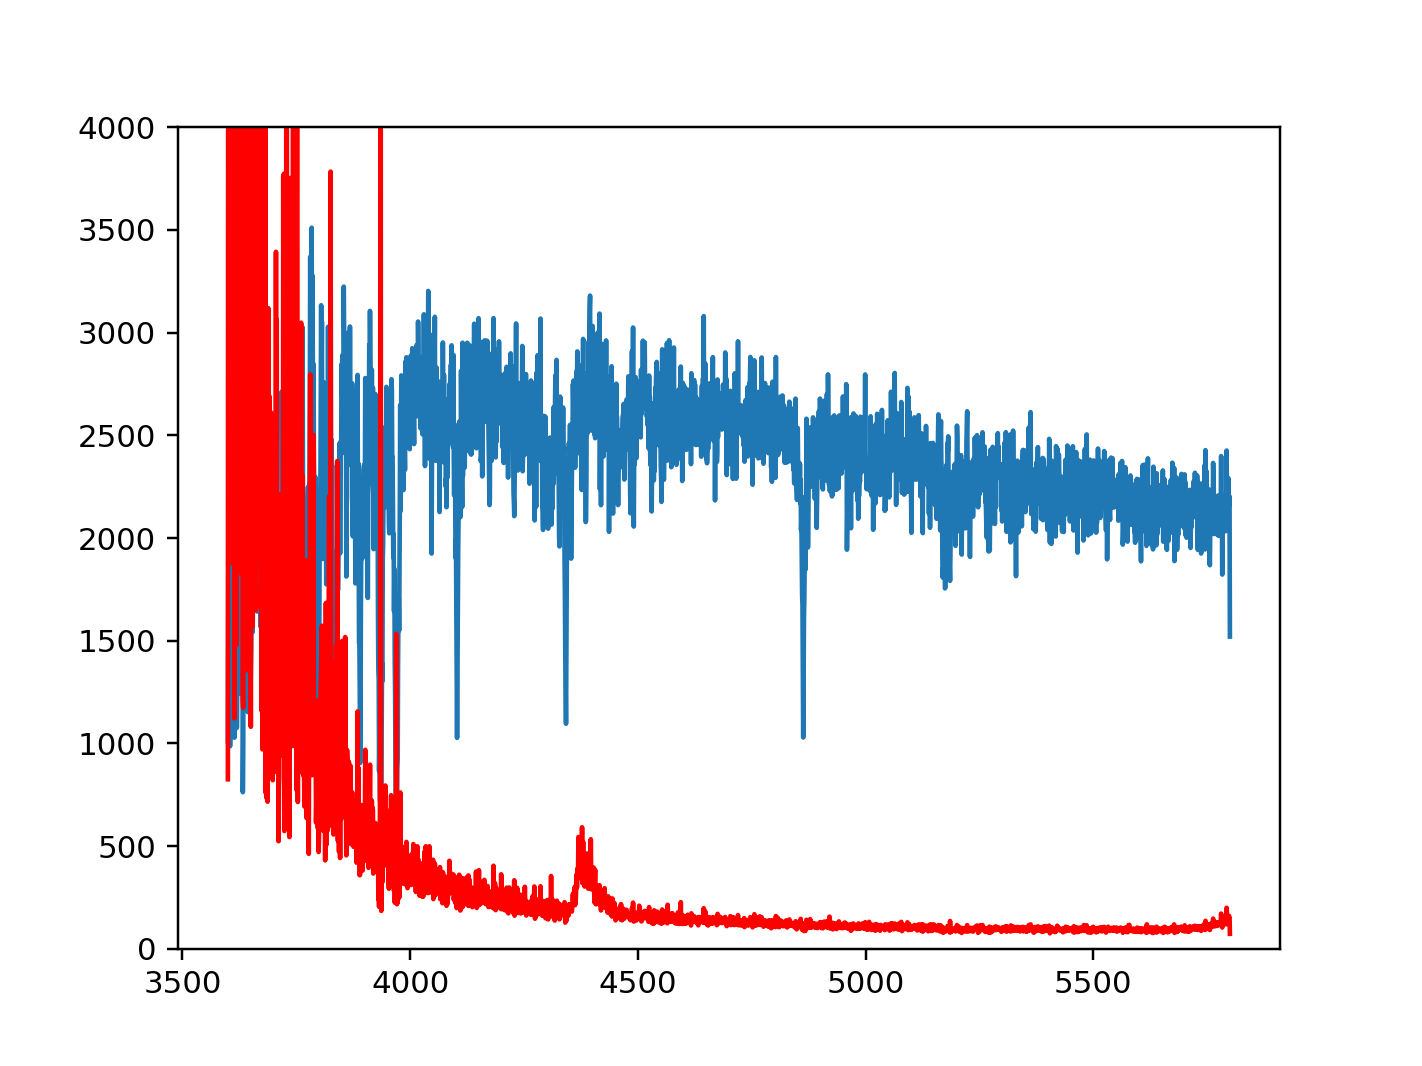

In [24]:
plt.clf()
ax = plt.gca()
ax.plot(b_wave, b_flux[0,:])
ax.plot(b_wave, 1./np.sqrt(b_ivar[0,:]), color='r')
#
ax.set_ylim(0., 4000.)
#
plt.show()

## r camera

In [20]:
r_wave = hdul2[8].data
r_flux = hdul2[9].data

In [21]:
r_wave[1]-r_wave[0]

0.8000000000001819

<IPython.core.display.Javascript object>


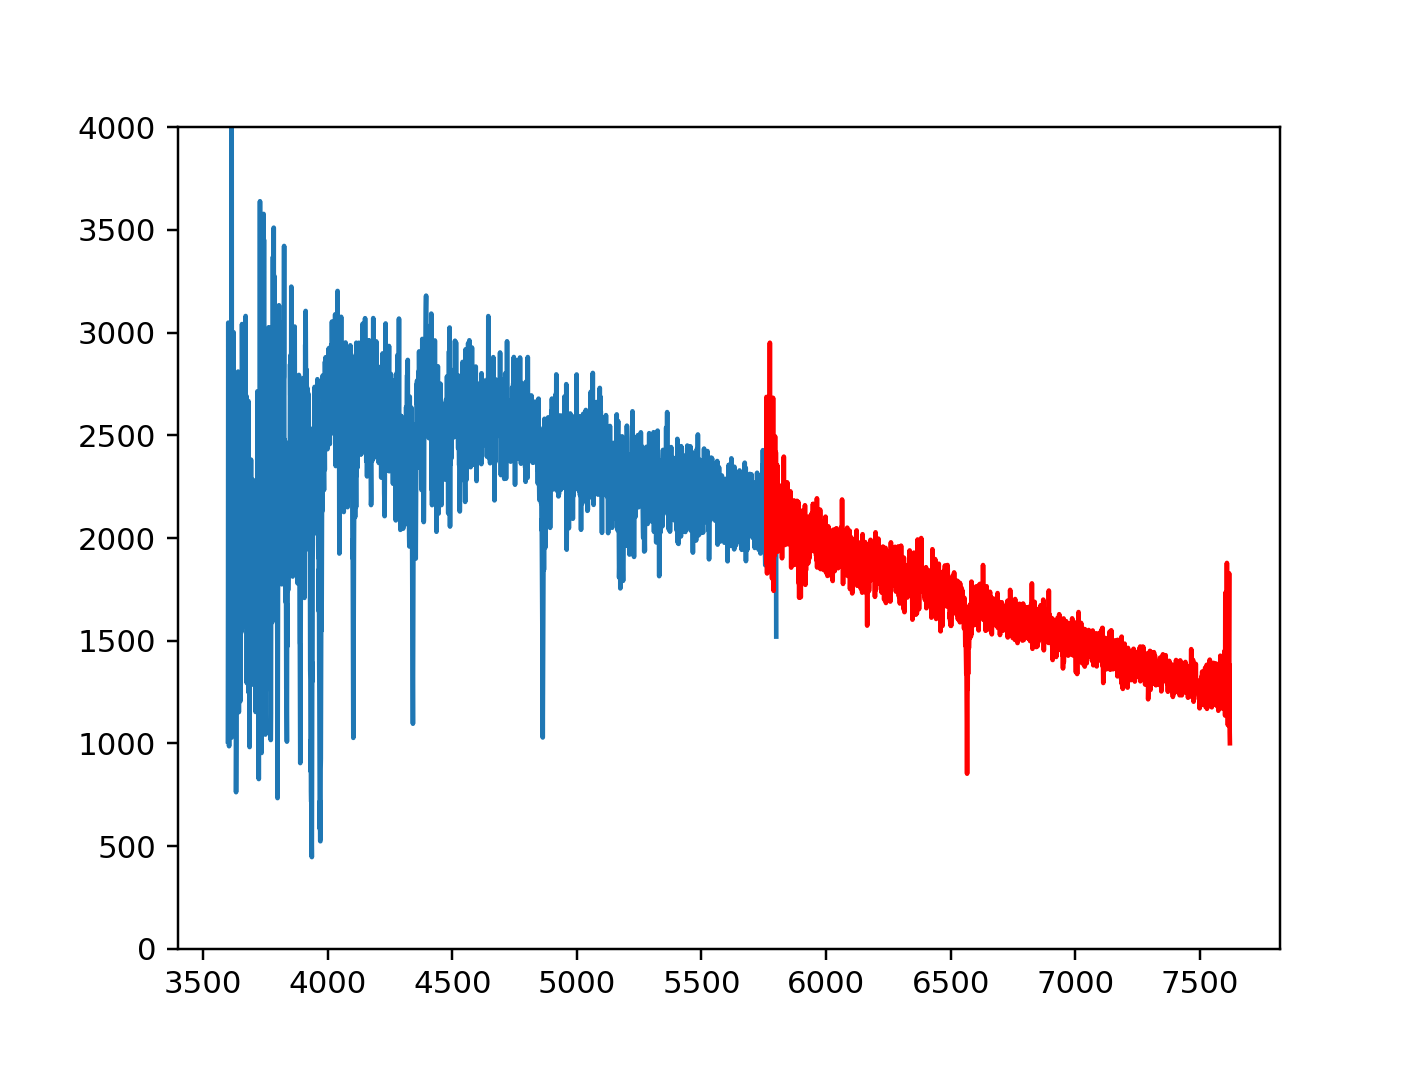

In [25]:
plt.clf()
ax = plt.gca()
ax.plot(b_wave, b_flux[0,:])
ax.plot(r_wave, r_flux[0,:], color='r')
#
ax.set_ylim(0., 4000.)
#
plt.show()

In [26]:
z_wave = hdul2[13].data
z_flux = hdul2[14].data

In [27]:
z_wave[1]-z_wave[0]

0.8000000000001819

<IPython.core.display.Javascript object>


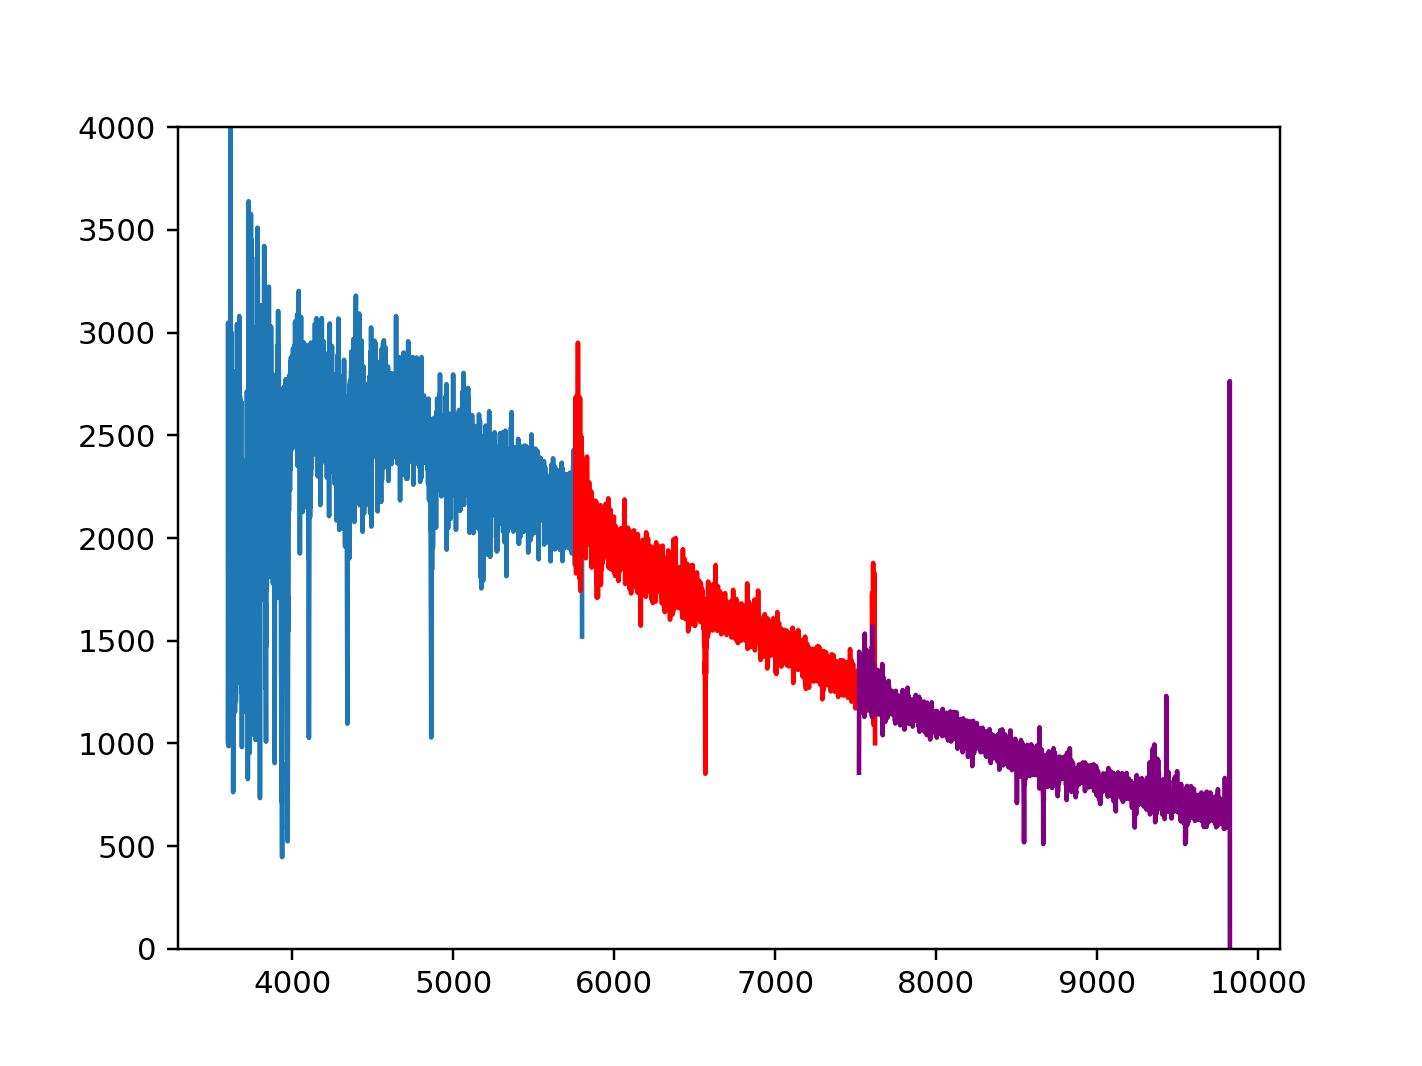

In [28]:
plt.clf()
ax = plt.gca()
ax.plot(b_wave, b_flux[0,:])
ax.plot(r_wave, r_flux[0,:], color='r')
ax.plot(z_wave, z_flux[0,:], color='purple')

#
ax.set_ylim(0., 4000.)
#
plt.show()

## coadd

In [29]:
c_b_wave = hdul[2].data
c_b_flux = hdul[3].data
c_b_ivar = hdul[4].data

In [30]:
idx = np.where(c_fibers['FIBER'] == 0)[0][0]
idx

175

In [31]:
c_b_flux[idx,:]

array([1010.1037, 1703.3542, 3048.7896, ..., 2193.51  , 2202.8604,
       1519.919 ], dtype=float32)

<IPython.core.display.Javascript object>


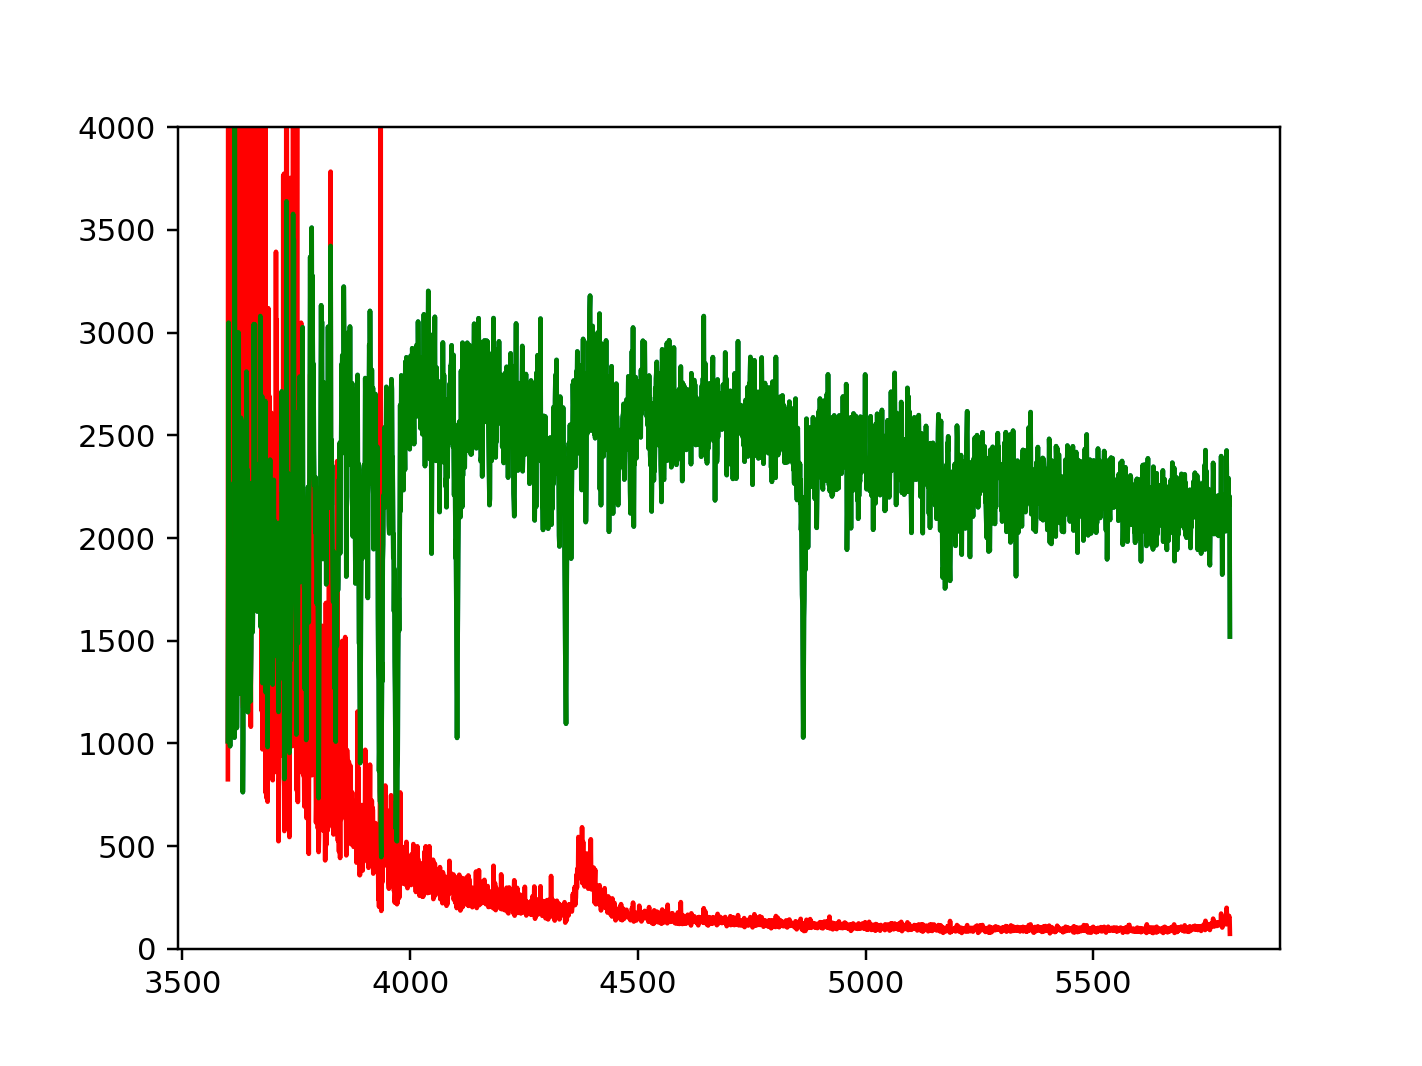

In [32]:
plt.clf()
ax = plt.gca()
ax.plot(c_b_wave, c_b_flux[idx,:])
ax.plot(c_b_wave, 1./np.sqrt(c_b_ivar[idx,:]), color='r')
# 
ax.plot(b_wave, b_flux[0,:], c='g')

#
ax.set_ylim(0., 4000.)
#
plt.show()

# zbest

In [33]:
zhdul = fits.open(os.path.join(path, 'tiles/63165/20200224/zbest-0-63165-20200224.fits'))
zhdul.info()

Filename: /home/xavier/DESI/DESI_SCRATCH/tiles/63165/20200224/zbest-0-63165-20200224.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1  ZBEST         1 BinTableHDU     35   500R x 13C   [K, D, 10D, D, D, K, K, 6A, 20A, K, D, J, J]   
  2  FIBERMAP      1 BinTableHDU    279   500R x 135C   [K, I, J, K, J, J, D, D, E, E, E, E, E, E, K, B, 3A, E, E, I, J, D, J, J, I, J, 8A, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, E, E, E, E, E, E, B, B, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, 2A, E, E, E, E, E, E, E, E, L, E, L, E, E, 1A, K, K, K, K, E, E, E, E, K, K, K, K, D, D, D, D, D, D, J, J, D, J]   


In [34]:
z_fiber = Table(zhdul[2].data)
z_fiber

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,PMRA_IVAR,PMDEC_IVAR,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,NUMTARGET,PRIORITY,SUBPRIORITY,OBSCONDITIONS,NUMOBS_MORE,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,TARGET_RA_IVAR,TARGET_DEC_IVAR,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_E1,SHAPEDEV_E2,SHAPEDEV_R_IVAR,SHAPEDEV_E1_IVAR,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_E1,SHAPEEXP_E2,SHAPEEXP_R_IVAR,SHAPEEXP_E1_IVAR,SHAPEEXP_E2_IVAR,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PHOTSYS,CMX_TARGET,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,BLOBDIST,FIBERFLUX_IVAR_G,FIBERFLUX_IVAR_R,FIBERFLUX_IVAR_Z,DESI_TARGET,BGS_TARGET,MWS_TARGET,NUM_ITER,FIBER_X,FIBER_Y,DELTA_X,DELTA_Y,FIBER_RA,FIBER_DEC,NIGHT,EXPID,MJD,TILEID
int64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int64,uint8,str3,float32,float32,int16,int32,float64,int32,int32,int16,int32,str8,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32,float32,str1,int64,int64,int64,int64,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32
35186468343252284,0,311,311,0,0,105.96247263660705,30.741023652112773,-2.164497,2.0961485,256.0359,319.6166,2015.5,5400.0,32,1,TGT,81.48669,-285.69293,0,77,0.4176726845053452,65535,19,8000,499786,1058p307,1340,PSF,1.331873e+16,1.4211426e+16,0.07609841,4927.1714,6335.023,5701.7295,0.052998025,0.012293585,0.013591074,0.79830325,0.85920894,0.9186243,0.00022667555,0.00012196559,0.00043174144,0.95283216,0.96571153,0.9588132,1.0000002,1.0000013,1.0000004,1,1,3,0.0,0.0,0.0,0.0,0.0,0.0,1815.3815,993.40027,101.54274,-54.945637,2.495676,0.48024192,0.0006336586,9.629224e-06,0.9871864,0.9921112,0.9983123,0.9993624,2,2,2,3832.4275,4927.475,4434.89,3832.4275,4927.475,4434.89,0,0,2302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,888245214439632384,G2,12.957991,2501.3438,13.236764,683.13403,12.520352,971.2193,1.2046472,0.0,True,0.05217466,True,1.3972954,843.982,S,32,77,1,6311,0.0,0.0,0.0,0.0,0,0,0,3,81.43,-285.449,-0.008,-0.0,0.0,0.0,20200224,52022,58904.31561334,63165
35186468347447998,0,272,272,1,0,106.05267247391333,30.789467711630056,-3.5563195,-2.5879877,345.18762,568.53973,2015.5,5400.0,40,1,TGT,61.965694,-273.03677,0,74,0.6558083197917642,65535,19,8000,499787,1061p307,2750,PSF,1.9536045e+16,2.221344e+16,0.0828038,1872.4913,4515.877,6148.052,0.40196356,0.020486318,0.008917502,0.78261364,0.8477970

# Check

In [35]:
huge = Table.read('Huge_Table.fits')
huge

FileNotFoundError: [Errno 2] No such file or directory: 'Huge_Table.fits'